In [1]:
# Forecasting for PM10 and CO in AQI

In [2]:
# Libraries
import pandas as pd
import pandas as pandasForSortingCSV
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Dropout

import math
import glob
import os



In [3]:
# Upload Dataset and Sort
df = pd.read_csv('ispu_data.csv', index_col=0)
df.head(10)

,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
tanggal,,,,,,,,,
2019-01-01,29,15,7,71,13,71,O3,SEDANG,DKI2
2019-01-02,24,17,6,79,6,79,O3,SEDANG,DKI2
2019-01-03,23,16,6,65,4,65,O3,SEDANG,DKI2
2019-01-04,42,18,10,64,11,64,O3,SEDANG,DKI2
2019-01-05,54,29,16,51,20,54,PM10,SEDANG,DKI3
2019-01-06,69,34,30,105,27,105,O3,TIDAK SEHAT,DKI2
2019-01-07,71,47,16,132,25,132,O3,TIDAK SEHAT,DKI3
2019-01-08,51,22,25,143,26,143,O3,TIDAK SEHAT,DKI3
2019-01-09,61,22,28,198,21,198,O3,TIDAK SEHAT,DKI1


In [4]:
df.shape

(1076, 9)

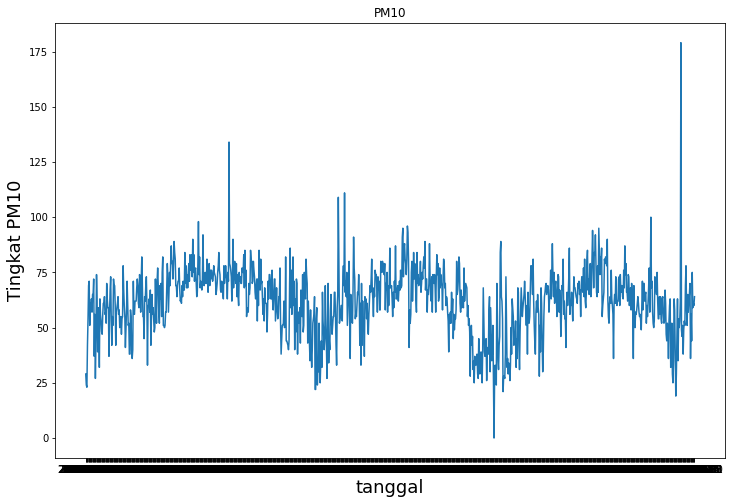

In [4]:
# PM10 Graph
plt.figure(figsize=(12,8))
plt.title("PM10")
plt.plot(df['pm10'])
plt.xlabel('tanggal', fontsize=18)
plt.ylabel('Tingkat PM10', fontsize=18)
plt.show()

In [5]:
df.describe()

,pm10,o3,no2,max
count,1076.000000,1076.000000,1076.000000,1076.000000
mean,61.869888,81.512082,25.739777,98.025093
std,15.001637,38.504181,22.025802,32.307251
min,0.000000,18.000000,3.000000,41.000000
25%,54.000000,53.000000,13.000000,76.000000
50%,63.000000,73.000000,17.000000,92.000000
75%,71.000000,100.000000,32.000000,114.000000
max,179.000000,243.000000,148.000000,243.000000


In [6]:
# Only PM10 Dataframe
data = df.filter(['pm10'])
print(data)
dataset = data.values

#Train Data
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

            pm10
tanggal         
2019-01-01    29
2019-01-02    24
2019-01-03    23
2019-01-04    42
2019-01-05    54
...          ...
2021-12-27    75
2021-12-28    59
2021-12-29    61
2021-12-30    60
2021-12-31    64

[1076 rows x 1 columns]


861

In [7]:
 #Data Scalling
scale = MinMaxScaler(feature_range=(0,1))
scaled_data = scale.fit_transform(dataset)

scaled_data

array([[0.16201117],
       [0.13407821],
       [0.12849162],
       ...,
       [0.34078212],
       [0.33519553],
       [0.3575419 ]])

In [8]:
#Build Training Dataset

train_data = scaled_data[0:training_data_len , :]

#Split train data
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.16201117, 0.13407821, 0.12849162, 0.23463687, 0.30167598,
       0.38547486, 0.39664804, 0.2849162 , 0.34078212, 0.32960894,
       0.35195531, 0.31843575, 0.36312849, 0.36312849, 0.40223464,
       0.20670391, 0.31284916, 0.15083799, 0.24581006, 0.41340782,
       0.34636872, 0.21787709, 0.32960894, 0.2849162 , 0.17877095,
       0.35195531, 0.31284916, 0.29608939, 0.26815642, 0.26256983,
       0.31284916, 0.34078212, 0.34078212, 0.3575419 , 0.31284916,
       0.31843575, 0.29050279, 0.39106145, 0.35195531, 0.32960894,
       0.32960894, 0.20670391, 0.31284916, 0.37430168, 0.40782123,
       0.30167598, 0.23463687, 0.30726257, 0.2849162 , 0.40223464,
       0.38547486, 0.38547486, 0.33519553, 0.23463687, 0.31843575,
       0.32960894, 0.34078212, 0.3575419 , 0.31284916, 0.32402235])]
[0.27932960893854747]



In [9]:
# Convert x_train, y_train to numpy

x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
# Reshape Data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(801, 60, 1)

In [12]:
# LSTM Model
model = Sequential()

model.add(LSTM(4, input_shape=(x_train.shape[1], 1)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')


In [13]:
# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Training Model
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
801/801 - 30s - loss: 0.0056 - 30s/epoch - 38ms/step
Epoch 2/100
801/801 - 23s - loss: 0.0044 - 23s/epoch - 29ms/step
Epoch 3/100
801/801 - 24s - loss: 0.0043 - 24s/epoch - 30ms/step
Epoch 4/100
801/801 - 24s - loss: 0.0042 - 24s/epoch - 30ms/step
Epoch 5/100
801/801 - 23s - loss: 0.0042 - 23s/epoch - 28ms/step
Epoch 6/100
801/801 - 23s - loss: 0.0041 - 23s/epoch - 29ms/step
Epoch 7/100
801/801 - 23s - loss: 0.0042 - 23s/epoch - 28ms/step
Epoch 8/100
801/801 - 23s - loss: 0.0042 - 23s/epoch - 28ms/step
Epoch 9/100
801/801 - 23s - loss: 0.0041 - 23s/epoch - 28ms/step
Epoch 10/100
801/801 - 23s - loss: 0.0041 - 23s/epoch - 28ms/step
Epoch 11/100
801/801 - 23s - loss: 0.0041 - 23s/epoch - 28ms/step
Epoch 12/100
801/801 - 23s - loss: 0.0041 - 23s/epoch - 28ms/step
Epoch 13/100
801/801 - 23s - loss: 0.0041 - 23s/epoch - 28ms/step
Epoch 14/100
801/801 - 23s - loss: 0.0041 - 23s/epoch - 28ms/step
Epoch 15/100
801/801 - 23s - loss: 0.0041 - 23s/epoch - 29ms/step
Epoch 16/100
801/80

In [15]:
# Build Testing Dataset
# Dataset containing the remainder of training_data_len
test_data = scaled_data[training_data_len - 60: , :]

# Dataset x_test, y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [16]:
#Convert Data to numpy (test)
x_test = np.array(x_test)

In [17]:
#Reshape test data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [18]:
#Trying Predict Value
pred = model.predict(x_test)
pred = scale.inverse_transform(pred)

7/7 [==============================] - 2s 17ms/step


In [19]:
# Evaluate the Model use root mean squared error RMSE
rmse = np.sqrt(np.mean(pred - y_test) ** 2)
rmse

0.672514094862827

C:\Users\zarek\AppData\Local\Temp\ipykernel_4476\1435648989.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = pred


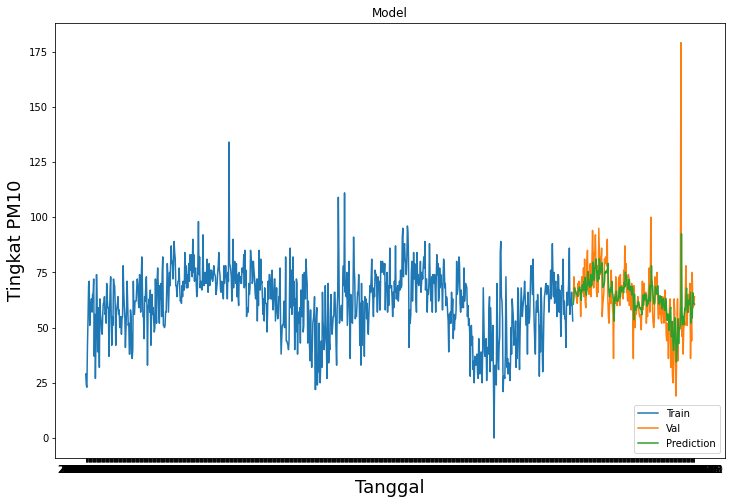

In [20]:
#Plot Data
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = pred

# Graph the Plot
plt.figure(figsize=(12,8))
plt.title('Model')
plt.xlabel('Tanggal', fontsize=18)
plt.ylabel('Tingkat PM10', fontsize=18)
plt.plot(train['pm10'])
plt.plot(validation[['pm10', 'Predictions']])
plt.legend(['Train', 'Val', 'Prediction'], loc='lower right')
plt.show()

In [21]:
validation

,pm10,Predictions
tanggal,,
2021-05-31,62,60.558628
2021-06-01,73,63.533768
2021-06-02,68,67.967186
2021-06-03,68,66.603340
2021-06-04,66,66.438904
...,...,...
2021-12-27,75,54.348045
2021-12-28,59,65.749336
2021-12-29,61,60.918991


In [22]:
validation[['pm10','Predictions']]

,pm10,Predictions
tanggal,,
2021-05-31,62,60.558628
2021-06-01,73,63.533768
2021-06-02,68,67.967186
2021-06-03,68,66.603340
2021-06-04,66,66.438904
...,...,...
2021-12-27,75,54.348045
2021-12-28,59,65.749336
2021-12-29,61,60.918991
